In [2]:
import pandas as pd
train = pd.read_csv("train.csv", header=None)
test = pd.read_csv("test.csv", header=None)

In [3]:
import numpy as np
train = np.asarray(train)
test = np.asarray(test)
first_pic = train[8]
pic_label, pic = first_pic[0], first_pic[1:]
print(pic_label)

7


In [4]:
import matplotlib.pyplot as plt
plt.imshow(pic.reshape((28, 28)).T, cmap='gray')
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.layers import Dropout

Using TensorFlow backend.


In [6]:
x_train = train[:, 1:785]
y_train = train[:, 0]
y_train = np_utils.to_categorical(y_train)
print(x_train.shape, y_train.shape)

(65000, 784) (65000, 27)


In [7]:
x_test = test[:, 1:785]
y_test = test[:, 0]
y_test = np_utils.to_categorical(y_test)
print(x_test.shape, y_test.shape)

(13000, 784) (13000, 27)


In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

In [9]:
N, M = x_train.shape #к-во объектов и признаков в обуч выборке
O = 1024 
P = 512
K = 64
T = 27
batch_size = 200
learning_rate = 0.001 
training_epochs = 10

In [10]:
tf.reset_default_graph()
model = Sequential()
model.add(Dense(O, input_dim = 784, batch_size = batch_size, activation = 'relu'))
model.add(Dense(P, activation='sigmoid'))
model.add(Dense(T, activation = 'softmax'))
model.compile(optimizer = 'nadam', loss='categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())
model.fit(x_train, y_train, epochs = training_epochs, batch_size = batch_size)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (200, 1024)               803840    
_________________________________________________________________
dense_2 (Dense)              (200, 512)                524800    
_________________________________________________________________
dense_3 (Dense)              (200, 27)                 13851     
Total params: 1,342,491
Trainable params: 1,342,491
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
65000/65000 [==============================] - 24s 374us/step - loss: 0.7748 - acc: 0.7683
Epoch 2/10
65000/65000 [==============================] - 21s 323us/step - loss: 0.3393 - acc: 0.8903
Epoch 3/10
65000/65000 [==============================] - 21s 327us/step - loss: 0.2494 - acc: 0.9157
Epoch 4/10
65000/65000 [==============================] - 24s 377us/step - loss: 0.19

<br/> sigmoid hard_sigmoid softmax RMSprop 93
<br/> relu sigmoid softmax nadam 97 90.4(test)

In [11]:
score = model.evaluate(x_test, y_test, batch_size = batch_size)
print('Loss: ', score[0], 'Acc: ', score[1])

13000/13000 [==============================] - 1s 83us/step
Loss:  0.3382075960819538 Acc:  0.9054615387549767


</br> Далее посмотрим сколько всего неправильных ответов дала нам наша нейронка на всей тестовой выборке

In [34]:
indexes = []
print('Длинна выборки = ',x_test.shape[0])
for i in range (0, x_test.shape[0]):
    first_pic = x_test[i]
    pic_label, pic = test[i,0], first_pic
    if pic_label != model.predict_classes(x_test[i:i+1]):
        indexes.append(i)
        
print('Кол-во неправильных ответов = ',len(indexes))

Длинна выборки =  13000
Кол-во неправильных ответов =  1229


</br> Ну а теперь посмотрим на каких буквах она ошибалась (возьмем 10)

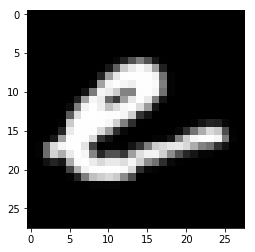

Реальное значение:  e ; Предсказанное:  c


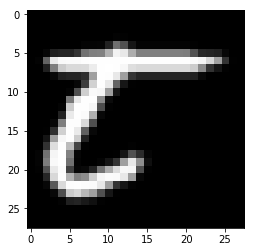

Реальное значение:  t ; Предсказанное:  c


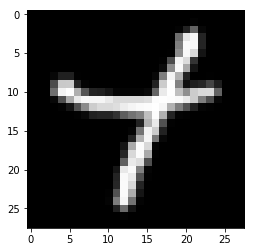

Реальное значение:  t ; Предсказанное:  y


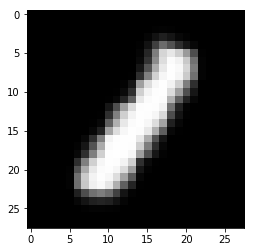

Реальное значение:  l ; Предсказанное:  i


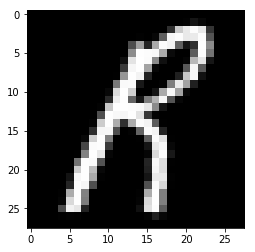

Реальное значение:  r ; Предсказанное:  a


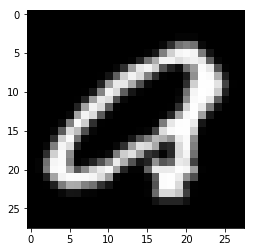

Реальное значение:  q ; Предсказанное:  a


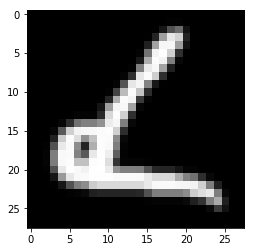

Реальное значение:  d ; Предсказанное:  l


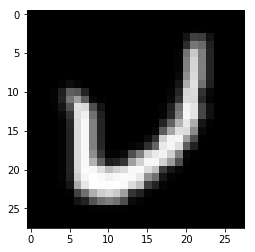

Реальное значение:  v ; Предсказанное:  u


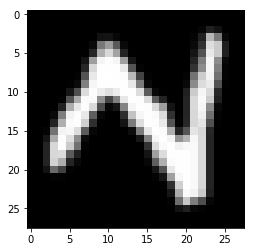

Реальное значение:  n ; Предсказанное:  m


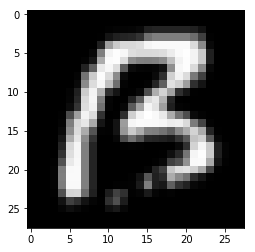

Реальное значение:  b ; Предсказанное:  a


In [15]:
characters = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s', 't','u','v','w','x','y','z']
for i in indexes[20:30]:
    first_pic = x_test[i]
    pic_label, pic = test[i,0], first_pic
    plt.imshow(pic.reshape((28, 28)).T, cmap='gray')
    plt.show()
    print('Реальное значение: ', characters[test[i, 0]-1], '; Предсказанное: ', characters[model.predict_classes(x_test[i:i+1])[0]-1])
#print(characters[test[indexes[1:10],0]], characters[for i in model.predict_classes(x_test[indexes[1:10]])])

</br> Хм.. Знаете, я и сам в половине ошибся бы.
</br> Ок, давайте посмотрим какие буквы с какими она путала и сколько раз. Для этого составим табличку (полная таблица в файле df.csv). Столбец - та буква, которая должна быть; строка - та, которая получилась.

In [40]:
errors = pd.DataFrame(index = characters, columns = characters)
errors = errors.fillna(0)

for i in indexes:
    errors[characters[test[i, 0]-1] ][characters[model.predict_classes(x_test[i:i+1])[0]-1]] += 1
    
#for j in range(errors.shape[0]):
#    for i in range(j, errors.shape[1]):
#        errors[characters[i]][characters[j]] += errors[characters[j]][characters[i]]
#        errors[characters[j]][characters[i]] = 0
        
print(errors)
errors.to_csv('df.csv', sep=';')

    a  b   c   d   e   f   g   h   i  j ...   q  r  s   t   u   v  w  x   y  z
a   0  4   1   1   1   0   5   5   0  0 ...   9  9  0   0   3   0  1  3   1  1
b   3  0   0  10   0   0   4  10   1  1 ...   0  0  1   0   0   0  0  0   1  0
c   4  0   0   0  17   0   0   0   0  0 ...   2  3  0   3   0   0  0  0   0  0
d   1  1   0   0   0   0   1   0   0  2 ...   0  0  0   0   0   1  0  0   0  1
e   1  2  11   0   0   1   1   0   1  0 ...   0  2  0   1   0   0  0  0   0  0
f   0  1   0   0   2   0   1   1   2  1 ...   4  5  1  13   0   0  0  1   1  1
g  10  6   1   0   3   2   0   0   0  2 ...  75  1  8   0   0   0  0  1   5  1
h   3  5   0   2   0   0   0   0   0  0 ...   0  1  0   0   0   1  1  0   1  0
i   0  1   0   0   1   0   0   0   0  4 ...   2  0  1   1   0   0  0  0   0  1
j   0  0   0   4   0   1   5   0  17  0 ...   0  0  4   3   1   1  0  0   3  0
k   1  0   0   1   0   0   0   4   0  0 ...   0  6  0   2   0   1  2  2   0  0
l   0  0   2   4   0   0   0   5  62  1 ...   0  0  

</br> Как мы видим (в полной табличке) больше всего нейронка путает буквы l с i (174), i с l (62), g с q (62), q с g (72), d с o (25). Это объяснимо тем, что даже печатные буквы в написании очень похожи. Что уж говорить про рукописные. Тем более, что некоторые из них написаны непонятно даже для человека.
<p> Далее посчитаем к-во каждой буквы в выборке

In [56]:
num_count = pd.DataFrame(index = characters, columns = [1])
num_count = num_count.fillna(0)

for i in range (0, x_test.shape[0]):
    pic_label= test[i,0]
    num_count[1][characters[pic_label-1]] += 1
print(num_count)

     1
a  500
b  500
c  500
d  500
e  500
f  500
g  500
h  500
i  500
j  500
k  500
l  500
m  500
n  500
o  500
p  500
q  500
r  500
s  500
t  500
u  500
v  500
w  500
x  500
y  500
z  500


<p> Оказалось, что все гораздо проще и их тут равное к-во. Хорошо, дальше посчитаем долю ошибки при определении каждой буквы. Для этого сложим значения по столбцам нашей таблицы и разделим его на 500.

In [70]:
errors_percent = pd.DataFrame(index = characters, columns = [1], dtype = np.float)
errors_percent = errors_percent.fillna(0)

for i in characters:
    sum_error = 0
    for j in characters:
        sum_error += errors[i][j]
    errors_percent[1][i] = sum_error / 500.
print(errors_percent)

       1
a  0.082
b  0.074
c  0.072
d  0.068
e  0.036
f  0.050
g  0.140
h  0.056
i  0.172
j  0.096
k  0.092
l  0.408
m  0.044
n  0.068
o  0.044
p  0.086
q  0.324
r  0.080
s  0.048
t  0.078
u  0.072
v  0.060
w  0.044
x  0.048
y  0.086
z  0.046


<p> L и i оказались самыми сложными буквами. Ну впрочем это легко объяснить исходя из их написания. Их действительно много с чем можно перепутать. Особенно если подчерк у человека такой себе)